#Guardado en Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Prueba de programación


In [ ]:
#Importar el módulo random
import random

#Ingresar la longitud deseada para la secuencia de ADN
length = int(input("Longitud de la secuencia: "))

#Define la función que genera la secuencia de ADN aleatoria
def generate_sequence(length):
    seq = "".join(random.choice("ATGC") for _ in range(length))

    #Generar la secuencia en formato FASTA con filas de 100 caracteres
    fasta_seq = ""
    for i in range(0, len(seq), 100):

        #Agregar el número inicial de cada fila
        fasta_seq += f"{i+1:>{len(str(length))}} {seq[i:i+100]}\n"

    print("\nSecuencia en formato FASTA:")
    print(fasta_seq)

    #Solicitar el Kmer que desea buscar en la secuencia de ADN.
    kmer_4 = input("Kmer Buscado: ")

    #Calcula y almacena la longitud de la secuencia generada
    len_seq = len(seq)
    #Cuenta el número de repeticiones
    count = seq.count(kmer_4)
    #Crea una lista vacía para almacenar las posiciones desde 0
    positions = []

    start = 0

    #Inicia un bucle infinito
    while True:
        index = seq.find(kmer_4, start)

        #Si el índice es -1, significa que no se encontró ninguna ocurrencia
        if index == -1:
            break
        positions.append(index)

        #Actualiza el valor de start para buscar la siguiente ocurrencia a partir de la posición después de la ocurrencia actual.
        start = index + len(kmer_4)

    print("Número de repeticiones:", count)
    print("Posiciones:", positions)

#Llamar a la función para generar y analizar la secuencia de ADN
generate_sequence(length)


Longitud de la secuencia: 1000

Secuencia en formato FASTA:
   1 TGTTGAGCATTGACAGGCAAGGCCCACGTTGAGATTACGGCCAACAGCATCCAGATTTACCAGCACTTAAACATAAAACCTTCCGGTGGTAAACGAAAGT
 101 CTTTATAACTGACCGATAGGAGTTCTGTCCCCGCCTTTCACTGTCATCCTTAAAGATGACTTTGCCGTAGGGATCGGCTAACCTGCGCGTCGGCTTTGGA
 201 TTGGTACACCGCCGAGGAATCCTACTTCACTTGCACCTTGTCCGTAAGTTCACGCCGGGCTAAGGTCTTGCCGCCTCATTGTATCGAATCCGGTTCGCGC
 301 GTTCGGCCCAGAACCGCGGGCCACCCCTCTACTTGCCGGAGAAGTCCTGTGCAAGATTGAGTCAAAATGGGGCTGTTATCTGCCTTTAAGGTGCAGATAG
 401 TTCTCCTATAGTGCTTGTAATATCTGAGCGGAAGAAACCGTCCCACCGCATATCTCCACAAGCGCTTACTTCACGTGTAATTGGCGACCAATAACGTACC
 501 CCACCGAGACGACCGCGCCTCACCCAAACGGTCACCCGTTGCTTCCTTTGCAGTAAAGGTCGACTCTGTCATAGGGGATCGGTAGTTTTATCACGTCAAC
 601 TTTAAGATCTGACCCCAGTATCTACCCGTCTTTAGGCGTCTGCAAGGCCACTGCCCCGAGCATTGGATCACGGGCTAGACGCTTAAGAAAAGTAATCGCC
 701 TCCGAATCTGATGTGGCCCCGCCATAGTTTGAGCCATAATTTTGTCGCCTATTCTAGGCTAGCAGTGTACTTTGGTGCGTTTTACAGCGCATAATTATGA
 801 ATTCGCTTGATCCGGCATTTGGTTTGACCCTCGGGTTGGGAACAACGGGGGGTGCGGTACCCGTGCTGCTATTAATATTCGGGAACG

#Generación de Secuencias DNA-Proteína

In [ ]:
#Importar el módulo random para generar números aleatorios
import random

#Definir nucleotidos para secuencia aleatoria
nucleotides=['T', 'C', 'A', 'G']
#Define the starts and stop codons
Start_codon=['ATG']
Stop_codons=['TAA', 'TAG','TGA']

#Generar longitud deseada de la secuencia
longitud = int(input("longitud de la secuencia de ADN: "))

#Crear secuencia de ADN aleatoria
secuencia_adn = ''.join(random.choice(nucleotides) for _ in range(longitud))

#Definir tabla de traducción del codigo genetico
genetic_code ={
  # U            C            A            G

#U
  'TTT':'F', 'TCT':'S', 'TAT':'Y', 'TGU':'C', #UxU
  'TTC':'F', 'TCC':'S', 'TAC':'Y', 'TGC':'C', #UxC
  'TTA':'L', 'TCA':'S', 'TAA':'-', 'TGA':'-', #UxA
  'TTG':'L', 'TCG':'S', 'TAG':'-', 'TGG':'W', #UxG
#C
  'CTT':'L', 'CCT':'P', 'CAT':'H', 'CGT':'R', #CxU
  'CTC':'L', 'CCC':'P', 'CAC':'H', 'CGC':'R', #CxC
  'CTA':'L', 'CCA':'P', 'CAA':'Q', 'CGA':'R', #CxA
  'CTG':'L', 'CCG':'P', 'CAG':'Q', 'CGG':'R', #CxG
#A
  'ATT':'I', 'ACU':'T', 'AAT':'N', 'AGT':'S', #AxU
  'ATC':'I', 'ACC':'T', 'AAC':'N', 'AGC':'S', #AxC
  'ATA':'I', 'ACA':'T', 'AAA':'K', 'AGA':'R', #AXA
  'ATG':'M', 'ACG':'T', 'AAG':'K', 'AGG':'R', #AxG
#G
  'GTT':'V', 'GCT':'A', 'GAT':'D', 'GGT':'G', #GxU
  'GTC':'V', 'GCC':'A', 'GAC':'D', 'GGC':'G', #GxC
  'GTA':'V', 'GCA':'A', 'GAA':'E', 'GGA':'G', #GxA
  'GTG':'V', 'GCG':'A', 'GAG':'E', 'GGG':'G', #GxG
}

#Tradu decir secuencia de ADN a proteínas
secuencia_proteinas = ''
i = 0

#Bucle para recorrer los codones en la secuencia de ADN
while i < len(secuencia_adn) - 2:
    codon = secuencia_adn[i:i+3]
    aminoacido = genetic_code.get(codon, 'X') #Busca el aminoácido correspondiente al codón utilizando
    secuencia_proteinas += aminoacido #Agrega el aminoácido a la secuencia de proteínas

    #if aminoacido == '*':
        #break #Si el aminoácido es un codón STOP, se detiene el bucle

    i += 3 #Irementa el índice en 3 para pasar al siguiente codón

print(len(secuencia_adn))
print(len(secuencia_proteinas))

longitud de la secuencia de ADN: 30000000
30000000
10000000


#Datasets Nucleotidos

In [ ]:
#Proporcionar operaciones eficientes en matrices
import numpy as np

def generar_ngramas(seq, n):
    ngramas = []  #Lista para almacenar los n-gramas
    k = 0  #Variable de índice para recorrer la secuencia
    for i in range((len(seq) + 1) // n):  #Bucle para generar los n-gramas
        ngrama = seq[k:k+n]  #Extrae el n-grama actual
        k += n  #Actualiza el índice
        ngramas.append(ngrama)  #Agrega el n-grama a la lista
    return ngramas

seq = secuencia_adn  #Variable que contiene la secuencia de ADN
n = 3  #Valor que indica la longitud de los n-gramas (trigramas en este caso)

ngramas = generar_ngramas(seq, n)  #Genera los n-gramas llamando a la función

#Control de el código que imprime los n-gramas
"""
print("N-gramas:")
for ngrama in ngramas:
    print(ngrama)
"""

#Convierte los n-gramas en una matriz NumPy
X_train = np.array([list(ngrama) for ngrama in ngramas])

#Convierte las letras en valores ASCII y crea una matriz NumPy
X_train = np.array([[ord(letra) for letra in ngrama] for ngrama in ngramas])

print("X_train:")
print(X_train)
print(len(X_train))


X_train:
[[84 67 65]
 [71 67 67]
 [71 67 67]
 ...
 [67 65 84]
 [67 65 67]
 [67 84 65]]
10000000


#Datasets Aminoácidos

In [ ]:
#Generación de secuencias de proteinas
protein_sequences = secuencia_proteinas
#Generar monogramas
monogramas = [c for seq in protein_sequences for c in seq]

#print("Monogramas:")
#print(monogramas)

#Crear el diccionario de caracteres
caracteres = sorted(list(set(monogramas)))
caracter_a_indice = {caracter: indice for indice, caracter in enumerate(caracteres)}

#Generar y_train
y_train = np.array([caracter_a_indice[caracter] for caracter in monogramas])
#print("y_train:")
#print(y_train)
print(len(y_train))

10000000


#Entrenamiento

In [ ]:

#Construir una red neuronal utilizando la API de alto nivel de Keras
import tensorflow as tf

#Definir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(3, 1)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

#Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

#Definir y asignar los datos de entrenamiento
#X_train = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
#y_train = np.array([10, 20, 30])

#Entrenar el modelo
model.fit(X_train, y_train, epochs=50)

#Predecir valores de y_train a partir de X_train
y_train_pred = model.predict(X_train)

model.save("/content/drive/MyDrive/Colab Notebooks/Entrenamiento IA/dna2prot" )



Epoch 1/50
312500/312500 [==============================] - 719s 2ms/step - loss: 2.4100
Epoch 2/50
312500/312500 [==============================] - 723s 2ms/step - loss: 0.5623
Epoch 3/50
312500/312500 [==============================] - 716s 2ms/step - loss: 0.4379
Epoch 4/50
312500/312500 [==============================] - 708s 2ms/step - loss: 0.3862
Epoch 5/50
312500/312500 [==============================] - 700s 2ms/step - loss: 0.3659
Epoch 6/50
312500/312500 [==============================] - 704s 2ms/step - loss: 0.3699
Epoch 7/50
312500/312500 [==============================] - 710s 2ms/step - loss: 0.3390
Epoch 8/50
312500/312500 [==============================] - 686s 2ms/step - loss: 0.3302
Epoch 9/50
312500/312500 [==============================] - 688s 2ms/step - loss: 0.3234
Epoch 10/50
312500/312500 [==============================] - 689s 2ms/step - loss: 0.3206
Epoch 11/50
312500/312500 [==============================] - 687s 2ms/step - loss: 0.3179
Epoch 12/50
312500/

#Evaluación del Modelo cargado

In [ ]:
#Evaluar el rendimiento de modelo cargado
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Entrenamiento IA/dna2prot")
model.evaluate(X_train, y_train)

312500/312500 [==============================] - 609s 2ms/step - loss: 8.3911e-05


8.391059236600995e-05

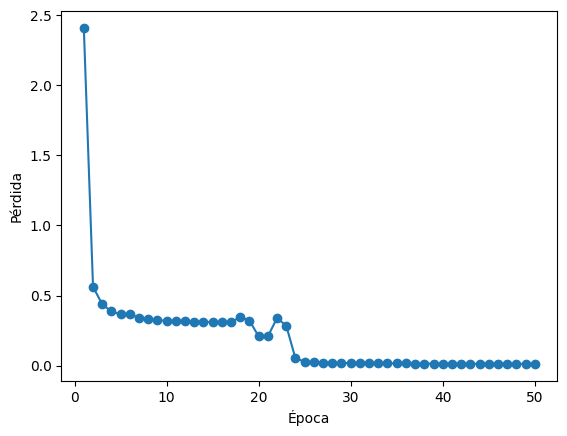

In [ ]:
import matplotlib.pyplot as plt

# Valores de pérdida por época
loss_values = [
    2.4100, 0.5623, 0.4379, 0.3862, 0.3659, 0.3699, 0.3390, 0.3302, 0.3234,
    0.3206, 0.3179, 0.3163, 0.3141, 0.3126, 0.3105, 0.3093, 0.3083, 0.3489,
    0.3212, 0.2086, 0.2090, 0.3397, 0.2842, 0.0509, 0.0290, 0.0239, 0.0218,
    0.0202, 0.0190, 0.0183, 0.0179, 0.0175, 0.0165, 0.0158, 0.0156, 0.0157,
    0.0143, 0.0145, 0.0139, 0.0137, 0.0137, 0.0136, 0.0130, 0.0125, 0.0127,
    0.0128, 0.0124, 0.0127, 0.0122, 0.0120
]

# Crear una lista de épocas
epochs = list(range(1, 51))

# Graficar la pérdida por época
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.plot(epochs, loss_values, marker='o')  # Usar marcadores para cada época
plt.show()


#Predicción

In [ ]:
import numpy as np
import tensorflow as tf

# Cargar el modelo previamente entrenado
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Entrenamiento IA/dna2prot')

# Esta función genera n-gramas de una secuencia dada
def generar_ngramas(seq, n):
    ngramas = []
    k = 0
    for i in range((len(seq) + 1) // n):
        ngrama = seq[k:k+n]  # Extraemos el n-grama actual
        k += n  # Actualizamos la variable de control para el siguiente n-grama
        ngramas.append(ngrama)  # Agregamos el n-grama a la lista
    return ngramas

# Solicitar al usuario que ingrese la secuencia
seq = input("Secuencia de Nucleotidos: ")
# Imprimir la longitud de la secuencia ingresada
print("Longitud de la secuencia:", len(seq))

n = 3  # Longitud de los n-gramas

ngramas = generar_ngramas(seq, n)  # Generamos los n-gramas de la secuencia

# Convertimos los n-gramas en una matriz numérica con el valor numérico de cada letra
seq = np.array([[ord(letra) for letra in ngrama] for ngrama in ngramas])
y_train_pred = model.predict(seq)  # Realizamos una predicción
print(y_train_pred)

# Redondeamos los valores de la predicción a enteros
y_train_pred = np.round(y_train_pred).astype(int)

print(y_train_pred)


Secuencia de Nucleotidos: ATGCGGGTGGGCTGGATCAAAATACGGCTTCTGGGAGTAAGCAAACCTACCGAGGGATCAGGCGAGGGGACGGCCGTAATGGGGCAGGTGAGCAACACGATTTGTCGGGGATCTAAACGGCTGAGGAAGGGCAACCCTGGCGACACATCCCAGCGCGGGCGTTCCACCCACCGAGGAACCCGGGCGCCTCTCGAATGTCCCGGGTTCCGATCAGCCGGTCTGCGGCTGCCTTGGGATCCCTAG


Longitud de la secuencia: 243
3/3 [==============================] - 0s 7ms/step
[[ 1.10042953e+01]
 [ 1.49832897e+01]
 [ 1.80121326e+01]
 [ 6.00081444e+00]
 [ 1.90030937e+01]
 [ 8.00794601e+00]
 [ 9.00399780e+00]
 [ 8.00673676e+00]
 [ 1.49832897e+01]
 [ 9.98166656e+00]
 [ 9.98939896e+00]
 [ 6.01617813e+00]
 [ 1.80096531e+01]
 [ 1.59882412e+01]
 [ 9.00399780e+00]
 [ 1.29968758e+01]
 [ 1.69858646e+01]
 [ 4.00351143e+00]
 [ 6.01617813e+00]
 [ 1.60077744e+01]
 [ 6.00081444e+00]
 [ 4.00351143e+00]
 [ 6.00646305e+00]
 [ 1.70061340e+01]
 [ 1.00398254e+00]
 [ 1.80096531e+01]
 [ 1.10042953e+01]
 [ 6.00646305e+00]
 [ 1.40022964e+01]
 [ 1.80121326e+01]
 [ 1.59882374e+01]
 [ 1.19948540e+01]
 [ 1.70061340e+01]
 [ 7.98601151e+00]
 [ 1.99962120e+01]
 [ 1.49832897e+01]
 [ 6.01617813e+00]
 [ 1.59957829e+01]
 [ 9.00399780e+00]
 [ 1.49832897e+01]
 [ 9.98939896e+00]
 [ 1.49920006e+01]
 [ 8.98748779e+00]
 [ 6.00081444e+00]
 [ 1.19948435e+01]
 [ 1.29968758e+01]
 [ 6.00081444e+00]
 [ 3.00002480e+00]
 [ 1.69

#Traducción de predicción

In [ ]:
#Biblioteca para operaciones matemáticas y manipulación de matrices
import numpy as np

#Definir diccionario que asigna valores numéricos a letras y simbolos
dic = {
    0: '*',
    1: 'A',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'K',
    10: 'L',
    11: 'M',
    12: 'N',
    13: 'P',
    14: 'Q',
    15: 'R',
    16: 'S',
    17: 'T',
    18: 'V',
    19: 'W',
    20: 'Y'
}

value = []

# Convertir el ndarray a lista
y_train_pred_list = y_train_pred.tolist()
print("y_train_pred_list:", y_train_pred_list, "Longitud:", len(y_train_pred_list))

# Compresión de listas para "aplanar" una lista existente
lista_plana = [elemento for sublist in y_train_pred_list for elemento in sublist]
print("lista_plana:", lista_plana, "Longitud:", len(lista_plana))

# Utilizando la comprensión de listas, se crea una nueva lista
translation = [dic[int(value)] for value in lista_plana if int(value) in dic]
translated_string = ''.join(translation)

# Contar la longitud de las letras en la cadena y luego imprimir ese valor
length_of_letters = sum(1 for char in translated_string if char.isalpha())
print("translated_string:", translated_string)
print("Longitud de las letras en translated_string:", length_of_letters)

y_train_pred_list: [[11], [15], [18], [6], [19], [8], [9], [8], [15], [10], [10], [6], [18], [16], [9], [13], [17], [4], [6], [16], [6], [4], [6], [17], [1], [18], [11], [6], [14], [18], [16], [12], [17], [8], [20], [15], [6], [16], [9], [15], [10], [15], [9], [6], [12], [13], [6], [3], [17], [16], [14], [15], [6], [15], [16], [17], [7], [15], [6], [17], [15], [1], [13], [10], [4], [20], [13], [6], [5], [15], [16], [1], [6], [10], [15], [10], [13], [19], [3], [13], [0]] Longitud: 81
lista_plana: [11, 15, 18, 6, 19, 8, 9, 8, 15, 10, 10, 6, 18, 16, 9, 13, 17, 4, 6, 16, 6, 4, 6, 17, 1, 18, 11, 6, 14, 18, 16, 12, 17, 8, 20, 15, 6, 16, 9, 15, 10, 15, 9, 6, 12, 13, 6, 3, 17, 16, 14, 15, 6, 15, 16, 17, 7, 15, 6, 17, 15, 1, 13, 10, 4, 20, 13, 6, 5, 15, 16, 1, 6, 10, 15, 10, 13, 19, 3, 13, 0] Longitud: 81
translated_string: MRVGWIKIRLLGVSKPTEGSGEGTAVMGQVSNTIYRGSKRLRKGNPGDTSQRGRSTHRGTRAPLEYPGFRSAGLRLPWDP*
Longitud de las letras en translated_string: 80


MRVGWIKIRLLGVSKPTEGSGEGTAVMGQVSNTICRGSKRLRKGNPGDTSQRGRSTHRGTRAPLECPGFRSAGLRLPWDP

#Validación de la predicción

In [ ]:
def needleman_wunsch(seq1, seq2, match_score=1, mismatch_score=-1, gap_penalty=-1):
    # Inicializar matriz de programación dinámica
    n = len(seq1)
    m = len(seq2)
    dp = [[0 for _ in range(m + 1)] for _ in range(n + 1)]

    # Rellenar la matriz de programación dinámica
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = dp[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = dp[i - 1][j] + gap_penalty
            insert = dp[i][j - 1] + gap_penalty
            dp[i][j] = max(match, delete, insert)

    # Realizar el traceback para obtener el alineamiento
    alignment_seq1 = ""
    alignment_seq2 = ""
    i, j = n, m
    while i > 0 and j > 0:
        if dp[i][j] == dp[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score):
            alignment_seq1 = seq1[i - 1] + alignment_seq1
            alignment_seq2 = seq2[j - 1] + alignment_seq2
            i -= 1
            j -= 1
        elif dp[i][j] == dp[i - 1][j] + gap_penalty:
            alignment_seq1 = seq1[i - 1] + alignment_seq1
            alignment_seq2 = "-" + alignment_seq2
            i -= 1
        else:
            alignment_seq1 = "-" + alignment_seq1
            alignment_seq2 = seq2[j - 1] + alignment_seq2
            j -= 1

    # Agregar residuos restantes si alguna secuencia es más larga que la otra
    while i > 0:
        alignment_seq1 = seq1[i - 1] + alignment_seq1
        alignment_seq2 = "-" + alignment_seq2
        i -= 1

    while j > 0:
        alignment_seq1 = "-" + alignment_seq1
        alignment_seq2 = seq2[j - 1] + alignment_seq2
        j -= 1

    return alignment_seq1, alignment_seq2


def hamming_distance(seq1, seq2):
    if len(seq1) != len(seq2):
        raise ValueError("Las secuencias deben tener la misma longitud.")

    distance = 0
    for i, j in zip(seq1, seq2):
        if i != j:
            distance += 1

    return distance


def main():
    # Solicitar al usuario que ingrese la secuencia predicha
    secuencia1predicha = input("Ingresa la secuencia predicha: ")

    # Solicitar al usuario que ingrese la secuencia real
    secuencia2real = input("Ingresa la secuencia real: ")

    # Obtener el alineamiento utilizando Needleman-Wunsch
    alineamiento1, alineamiento2 = needleman_wunsch(secuencia1predicha, secuencia2real)

    # Imprimir las secuencias alineadas
    print("Secuencia predicha alineada:", alineamiento1)
    print("Secuencia real alineada:", alineamiento2)

    # Verificar que las secuencias alineadas tengan la misma longitud
    if len(alineamiento1) != len(alineamiento2):
        print("¡Error! Las secuencias alineadas no tienen la misma longitud.")

    # Calcular la distancia de Hamming entre las secuencias alineadas
    distancia = hamming_distance(alineamiento1, alineamiento2)
    print("La distancia de Hamming entre las secuencias alineadas es:", distancia)


if __name__ == "__main__":
    main()


Ingresa la secuencia predicha: MRVGWIKIRLLGVSKPTEGSGEGTAVMGQVSNTIYRGSKRLRKGNPGDTSQRGRSTHRGTRAPLEYPGFRSAGLRLPWDP
Ingresa la secuencia real: MRVGWIKIRLLGVSKPTEGSGEGTAVMGQVSNTICRGSKRLRKGNPGDTSQRGRSTHRGTRAPLECPGFRSAGLRLPWDP
Secuencia predicha alineada: MRVGWIKIRLLGVSKPTEGSGEGTAVMGQVSNTIYRGSKRLRKGNPGDTSQRGRSTHRGTRAPLEYPGFRSAGLRLPWDP
Secuencia real alineada: MRVGWIKIRLLGVSKPTEGSGEGTAVMGQVSNTICRGSKRLRKGNPGDTSQRGRSTHRGTRAPLECPGFRSAGLRLPWDP
La distancia de Hamming entre las secuencias alineadas es: 2


#Datos de entrenamiento no verificados

In [ ]:
#Datos de Entrenamiento NCBI .
#Nucleotidos Reference Sequence: NC_045512.2 21563-25384  Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
#Proteina Reference Sequence: YP_009724390.1  surface glycoprotein [Severe acute respiratory syndrome coronavirus 2]
import tempfile

codigo_entrenamiento = """

def needleman_wunsch(seq1, seq2, match_score=1, mismatch_score=-1, gap_penalty=-1):
    # Inicializar matriz de programación dinámica
    n = len(seq1)
    m = len(seq2)
    dp = [[0 for _ in range(m + 1)] for _ in range(n + 1)]

    # Inicializar primera fila y columna con penalizaciones por gaps
    for i in range(1, n + 1):
        dp[i][0] = dp[i - 1][0] + gap_penalty

    for j in range(1, m + 1):
        dp[0][j] = dp[0][j - 1] + gap_penalty

    # Rellenar la matriz de programación dinámica
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = dp[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = dp[i - 1][j] + gap_penalty
            insert = dp[i][j - 1] + gap_penalty
            dp[i][j] = max(match, delete, insert)

    # Realizar el traceback para obtener el alineamiento
    alignment_seq1 = ""
    alignment_seq2 = ""
    i = n
    j = m
    while i > 0 and j > 0:
        if dp[i][j] == dp[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score):
            alignment_seq1 = seq1[i - 1] + alignment_seq1
            alignment_seq2 = seq2[j - 1] + alignment_seq2
            i -= 1
            j -= 1
        elif dp[i][j] == dp[i - 1][j] + gap_penalty:
            alignment_seq1 = seq1[i - 1] + alignment_seq1
            alignment_seq2 = "-" + alignment_seq2
            i -= 1
        else:
            alignment_seq1 = "-" + alignment_seq1
            alignment_seq2 = seq2[j - 1] + alignment_seq2
            j -= 1

    # Lidiar con los residuos si las secuencias no tienen la misma longitud
    while i > 0:
        alignment_seq1 = seq1[i - 1] + alignment_seq1
        alignment_seq2 = "-" + alignment_seq2
        i -= 1

    while j > 0:
        alignment_seq1 = "-" + alignment_seq1
        alignment_seq2 = seq2[j - 1] + alignment_seq2
        j -= 1

    return alignment_seq1, alignment_seq2


def hamming_distance(seq1, seq2):
    if len(seq1) != len(seq2):
        raise ValueError("Las secuencias deben tener la misma longitud.")

    distance = 0
    for i in range(len(seq1)):
        if seq1[i] != seq2[i]:
            distance += 1

    return distance

# Secuencias originales
secuencia1predicha = "MFVFLVLLPLVSSQYVNLTTRYQLPPAYNSFTRGVPDKVFRSSVLHSYQDLFLPFFSNVYWFHAIHVSGTNGYKRFDNPVLPFNDGVFASYEKSNIIRGWIFGYYLDSKTQSLLIVNNAYNVVIKVYEFQFYNDPFLGVHKNNKSWMESEFRVSSANNCYFEVSQPFLMDLEGKQGNFKNLREFVFKNIDGFKISKHTPINLVRDLPQGFSALEPLVDLPIGINIYRFQYLLALHRSLYPGDSSSGWTAGAAAVGLQPRYFLLKNENGTITDAVDYALDPLSETKYTLKSFYVEKGIQYSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVAWNRKRISNYVADSVLNSASFSYFKYGVSPYKLNDLCFYNVADSFVIRGDEVRQIAPGQYGKIADNKLPDDFTGCVIAWNSNNLDSKVGGNNLRLFRKSNLKPFERDISYEIQAGSTPYNGVEGFNYFPLQSGFQPYNGVGQPRVVVLSFELLHAPAYVYGPKKSYNLVKNKYVNFNFNGLTGTGVLYESNKKFLPFQQFGRDIADYYDAVRDPQTLEILDITPYSFGGVSVITPGTNYSNQVAVLQDVNCTEVPVAIHADQLYPYWRVSTGSNVFQTRAGYLIGAEHVNNSEYDIPIGAGICASQYQYNSPRRARSVASQSIIAYMSLGAENSVASNNSIAIPTNFYISVTTEILPVSMTKTSVDYTMIYGDSYECSNLLLQGSFYTQLNRALYGIAVEQDKNTQEVFAQVKQIKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQGDCLGDIAARDLIYAQKFNGLYVLPPLLTDEMIAQYSALLAGTIYSGWTFGAGAALQIPFAMQMARFNGIGVTQNVLENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTVYQQLIRAAEIRASANLAAYKMSEYVLGQSKRVDFYGKGHLMSFPQSAPHGVVFLHVYVPAQEKNFTYAPAIYHDGKAHFPREGVFVSNGTHWFVTQRNFEPQIIYTDNTFVSGNYDVVIGIVNNTVDPLQPELDSFKEELDKFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKEQIKWPWIWLGFIAGLIAIVMVTIMLCYMTSCYSYLKGYYSYGSCCKFDEDDSEPVLKGVKLHT"
secuencia2real     = "MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT"

# Obtener el alineamiento utilizando Needleman-Wunsch
alineamiento1, alineamiento2 = needleman_wunsch(secuencia1predicha, secuencia2real)
print("Secuencia predicha alineada:", alineamiento1)
print("Secuencia real alineada:", alineamiento2)

# Calcular la distancia de Hamming entre las secuencias alineadas
try:
    distancia = hamming_distance(alineamiento1, alineamiento2)
    print("La distancia de Hamming entre las secuencias alineadas es:", distancia)
except ValueError as e:
    print("Error:", e)
"""

def guardar_codigo_temporal(codigo, ruta_destino, nombre_archivo):
    # Crear un archivo temporal de texto en la ruta de destino con el nombre especificado
    with tempfile.NamedTemporaryFile(suffix=".py", dir=ruta_destino, prefix=nombre_archivo, delete=False) as temp_file:
        # Escribir el código en el archivo temporal
        temp_file.write(codigo.encode())

    # Devolver la ruta del archivo temporal
    return temp_file.name

# Carpeta para guardar los archivos temporales
carpeta_destino = "/content/drive/MyDrive/Colab Notebooks/Entrenamiento IA/Datos temporales de Entrenamiento"

# Nombre del archivo temporal que deseas especificar
nombre_archivo_temporal = "Pro_S_SARS_CoV_2_"

# Guardar el código de entrenamiento en un archivo temporal dentro de la carpeta de destino
ruta_archivo_temporal = guardar_codigo_temporal(codigo_entrenamiento, carpeta_destino, nombre_archivo_temporal)

print("Código de entrenamiento guardado en:", ruta_archivo_temporal)

Código de entrenamiento guardado en: /content/drive/MyDrive/Colab Notebooks/Entrenamiento IA/Datos temporales de Entrenamiento/Pro_S_SARS_CoV_2_dndb374f.py
